# Medical Appointment No Shows

##### Why do 30% of patients miss their scheduled appointments?

110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment

<b>outline</b> <br>
1.[Introduction](#step-1) <br>
1.[Research Question](#step0) <br>
1.[Data connection](#step1) <br>
2.[Data wrangling](#step2) <br>
3.[Data Analysis](#step3) <br>
4.[Final Remarks](#step4) <br>


## Introduction <a id="step-1"></a>

This dataset contains data of around 110k medical appointments and whether a patient showed up or not. The dataset comes with additional information to each appointment such as: [gender, age, date of scheduling, date of actual appointment, neighborhood, sms-reminded as well as an indication for one or more diseases, the patient might suffer].

## Research Question <a id="step0"></a>

* the research question of this study is analyzing the relationship between the following personal parts of information and no-shows?
* Does the disease type has an impact on the 'no-show' of the patients? 
* Did SMS-reminders decrease the proportion of patients not showing up?

In [72]:
# importing libraries
from sklearn import linear_model
import pandas as pd
from sklearn.dummy import DummyRegressor
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

# Step 1 : 
### Step 1 : Data Connection and exploration <a id="step1"></a>

In [44]:
# read the data file
data=pd.read_csv("KaggleV2-May-2016.csv")

In [45]:
# create a data copy

df=data.copy()

In [46]:
# explore the data 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [48]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [49]:
#What size does the table, now dataframe have?
df.shape

(110527, 14)

In [50]:
# checking whether there is a duplicate values 

sum(df.duplicated())

0

##### some highlights of the data : 
   * age group between [-1 and 115], which is definalty needs a cleansing.
   * diseases such as [Hipertension, Diabetes, Alcoholism] are between 0 and 1.
   * handcap is between 0 and 4, which needs more description. 
   * SMS received between 0 and 1 which is normal. 
   * No missing values, since each column has 110.527 values.
   * No duplicate rows

# Data Wrangling  <a id="step2"></a>


### Step 2 : understanding the data set

<AxesSubplot:ylabel='Gender'>

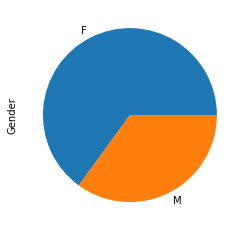

In [51]:
# understand the data

df.Gender.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Gender'>

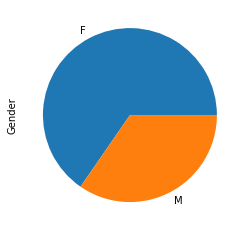

In [52]:
df.Gender[df['No-show']!='No'].value_counts().plot(kind='pie')

In [53]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [54]:
# investigating Handcap patients 
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The value distribution implies differentiations of the handicap-degree. 
* 0 appears to be no handicap. 
* 1- 5 is how severe the disability is. 
in our analysis we investigate whether the patient has a disability or not, the severity of it is not in our scope for now.

In [68]:
# cleaning handicap column [True: if handcap, False: if not]
df['Handcap-combined'] = df['Handcap'].astype('bool')
df['Handcap-combined'].value_counts()

False    108286
True       2241
Name: Handcap-combined, dtype: int64

In [55]:
df.replace('No',0,inplace=True)
df.replace('Yes',1,inplace=True)

In [56]:
# drop unnecessary fields

df[['PatientId', 'AppointmentID','Neighbourhood']]

,PatientId,AppointmentID,Neighbourhood
0,2.987250e+13,5642903,JARDIM DA PENHA
1,5.589978e+14,5642503,JARDIM DA PENHA
2,4.262962e+12,5642549,MATA DA PRAIA
3,8.679512e+11,5642828,PONTAL DE CAMBURI
4,8.841186e+12,5642494,JARDIM DA PENHA
...,...,...,...
110522,2.572134e+12,5651768,MARIA ORTIZ
110523,3.596266e+12,5650093,MARIA ORTIZ
110524,1.557663e+13,5630692,MARIA ORTIZ
110525,9.213493e+13,5630323,MARIA ORTIZ


In [57]:
## because of SMS received ?
df[['No-show','SMS_received','Diabetes','Scholarship','Hipertension','Handcap','Alcoholism','Age']].corr()

,No-show,SMS_received,Diabetes,Scholarship,Hipertension,Handcap,Alcoholism,Age
No-show,1.000000,0.126431,-0.015180,0.029135,-0.035701,-0.006076,-0.000196,-0.060319
SMS_received,0.126431,1.000000,-0.014550,0.001194,-0.006267,-0.024161,-0.026147,0.012643
Diabetes,-0.015180,-0.014550,1.000000,-0.024894,0.433086,0.057530,0.018474,0.292391
Scholarship,0.029135,0.001194,-0.024894,1.000000,-0.019729,-0.008586,0.035022,-0.092457
Hipertension,-0.035701,-0.006267,0.433086,-0.019729,1.000000,0.080083,0.087971,0.504586
Handcap,-0.006076,-0.024161,0.057530,-0.008586,0.080083,1.000000,0.004648,0.078033
Alcoholism,-0.000196,-0.026147,0.018474,0.035022,0.087971,0.004648,1.000000,0.095811
Age,-0.060319,0.012643,0.292391,-0.092457,0.504586,0.078033,0.095811,1.000000


In [58]:
## because the time difference between appointment booking date and show date? 


##1 chane column type to date


df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'],format='%Y-%m-%dT%H:%M:%SZ')

In [59]:
# check the updated data type
df[['AppointmentDay','ScheduledDay']].dtypes

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object

In [60]:
# substract both dates
df['waiting_time']=df['AppointmentDay'].dt.day-df['ScheduledDay'].dt.day
df['waiting_time']

0          0
1          0
2          0
3          0
4          0
          ..
110522     4
110523     4
110524   -20
110525   -20
110526   -20
Name: waiting_time, Length: 110527, dtype: int64

In [61]:
## check whether longer waiting time correlate with no show

df[['waiting_time','No-show']].corr()

,waiting_time,No-show
waiting_time,1.000000,-0.038823
No-show,-0.038823,1.000000


# Step 4 :  <a id="step3"></a>
### Step 4 : Data Analysis 

understanding the data in general, whether there is a correlation between the figures or not.

we will start with visualizing all pillars

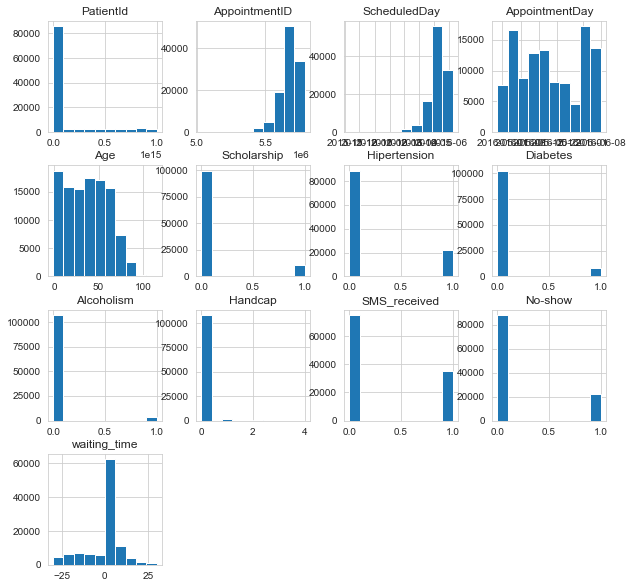

In [100]:
df.hist(figsize=(10,10));

<AxesSubplot:>

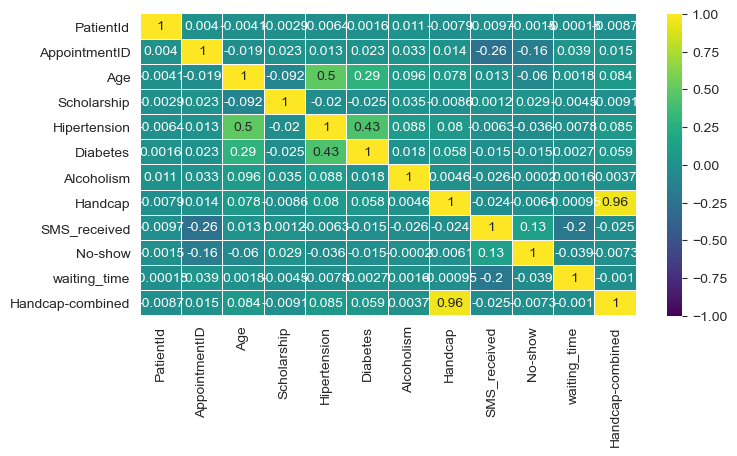

In [145]:
# Visualize correlation matrix
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "viridis", linewidths=0.01, annot=True)

findings: 
* the corrleation map shows there is no strong correlation between Show up and any other feature. 
* high correlation between handicap combined field [calculated] and handcap columns.  
* there is a average positive correlation between Hipertension on one hand and Age, and Diabetic.



# 1. Does Disease Type has an Impact on the no-show? 


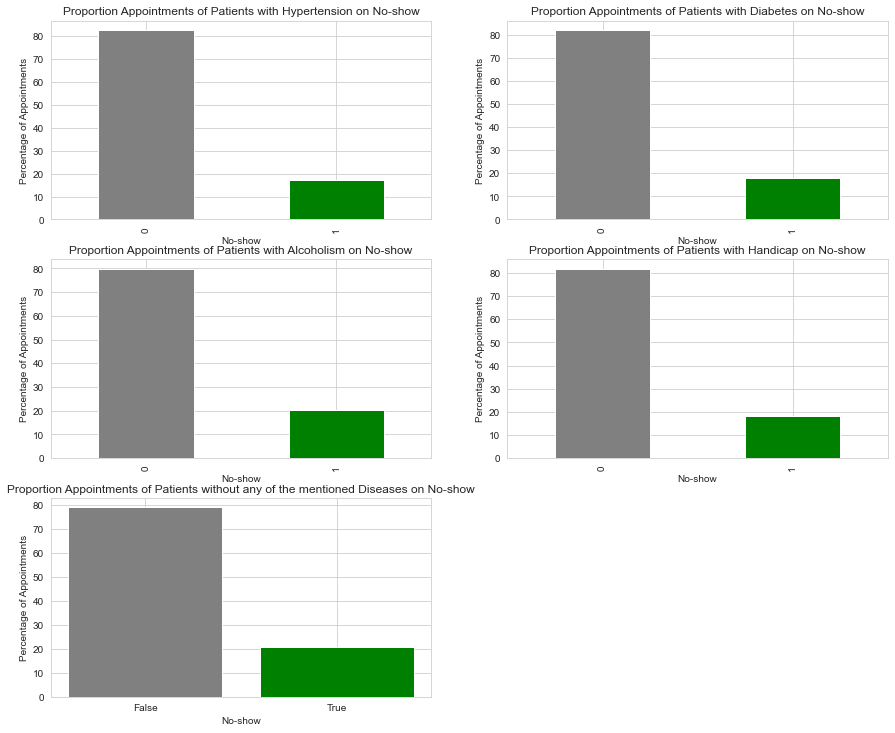

In [89]:

#For comparison, extracting patients without a stated disease into separate dataframes.
df_no_disease_showed_up = df[(df['No-show'] == False) & (df['Hipertension'] == False) & (df['Diabetes'] == False) & (df['Alcoholism'] == False) & (df['Handcap'] == False)]
df_no_disease_no_show = df[(df['No-show'] == True) & (df['Hipertension'] == False) & (df['Diabetes'] == False) & (df['Alcoholism'] == False) & (df['Handcap'] == False)]

#Calculation the total amounts of appointments per disease for proportion calculuation later on.
amount_no_disease = df_no_disease_showed_up['AppointmentDay'].count() + df_no_disease_no_show['AppointmentDay'].count()
amount_Hipertension = sum(df.groupby(['No-show']).sum()['Hipertension'])
amount_Diabetes = sum(df.groupby(['No-show']).sum()['Diabetes'])
amount_Alcoholism = sum(df.groupby(['No-show']).sum()['Alcoholism'])
amount_Handcap_combined = sum(df.groupby(['No-show']).sum()['Handcap-combined'])

#Calculation the proportions of No-show and Show-up per disease and for no-disease
hipertension = df.groupby(['No-show']).sum()['Hipertension']/amount_Hipertension *100
diabetes = df.groupby(['No-show']).sum()['Diabetes']/amount_Diabetes * 100
alcoholism = df.groupby(['No-show']).sum()['Alcoholism']/amount_Alcoholism * 100
handcap_combined = df.groupby(['No-show']).sum()['Handcap-combined']/amount_Handcap_combined * 100
no_disease_showed_up_proportion = df_no_disease_showed_up['AppointmentDay'].count() / amount_no_disease * 100
no_disease_no_show_proportion = df_no_disease_no_show['AppointmentDay'].count() / amount_no_disease * 100


#Plotting results of calculations above.
# Styling the graphs
fig = plt.figure(figsize=(15,30)) 
sns.set_style('whitegrid')

# Defining the graphs
plt.subplot(7,2,1)
hipertension.plot.bar(["False","True"], color=['grey','green'])
plt.title('Proportion Appointments of Patients with Hypertension on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,2)
diabetes.plot.bar(["False","True"], color=['grey','green'])
plt.title('Proportion Appointments of Patients with Diabetes on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,3)
alcoholism.plot.bar(["False","True"], color=['grey','green'])
plt.title('Proportion Appointments of Patients with Alcoholism on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,4)
handcap_combined.plot.bar(["False","True"],[0,1], color=['grey','green'])
plt.title('Proportion Appointments of Patients with Handicap on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,5)
plt.bar(["False","True"], [no_disease_showed_up_proportion, no_disease_no_show_proportion], color=['grey','green']);
plt.title('Proportion Appointments of Patients without any of the mentioned Diseases on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments');

##### The graphs elaborate the proportions of different appointments with no-show (False, True) per each disease type and then the general now show:
    
#### output: 

The highest proportion of "No-shows" has the group of patients without any of the mentioned diseases. 
* The lowest has the group of patients with a <b>handicap</b>. 

the output results shows all diseases have a very similar Show and No-show proportions,  <b>the type of the disease does not appear to have a relationship with the no-show proportions </b>.

# 2. Does the Demographics has an impact of the no-show? 

the question here is whether the domgraphy has an impact on the no-show of the data, in terms of <b> gender </b> and <b> age group </b>

In [105]:
df.groupby(['No-show','Gender'], as_index=False).size()

,No-show,Gender,size
0,0,F,57246
1,0,M,30962
2,1,F,14594
3,1,M,7725


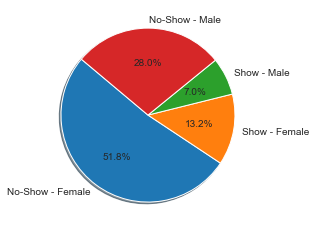

In [108]:
labels = ['No-Show - Female', 'Show - Female', 'Show - Male', 'No-Show - Male']
sizes = [len(df[(df['No-show'] == 0) & (df['Gender'] == 'F')]),
         len(df[(df['No-show'] == 1) & (df['Gender'] == 'F')]),        
         len(df[(df['No-show'] == 1) & (df['Gender'] == 'M')]),
         len(df[(df['No-show'] == 0) & (df['Gender'] == 'M')])]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

findings: 
* As we can see the percentage of females that don't show up are higher than the males.
* the percentage of females that show up is higher 

thus, we can conclude that number of females that come to the clinic is higher than males

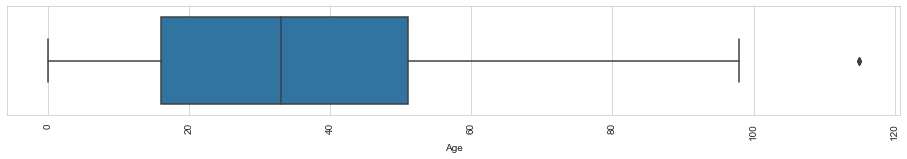

In [143]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)

data2 = sns.boxplot(x=(df.Age[df['No-show']==1]))
plt.show()

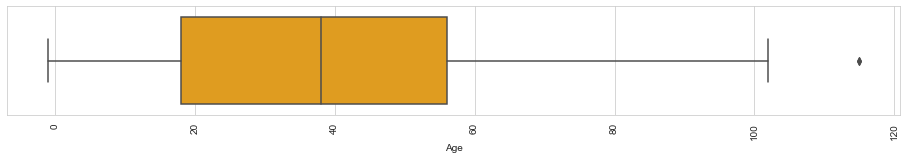

In [142]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
data1 = sns.boxplot(x=(df.Age[df['No-show']==0]),color='orange')

###### Output results

From the above BoxPlot we can see the following: 

* that the Median Age is around 30 and the IQR is between 18 and 55 for patients who show for their appointments.
* quite similar results for no show patients only the Median Age is a bit higher (late 30s) . 

Generally speaking, the BoxPlot shows the average age of customers who don't show for their appoitnements is a bit higher than the one who shows. 

## 3. does SMS reminder has an impact on the results ?

In [181]:

# Does receiving SMS makes a gender difference?


cluster_count=df.groupby(['SMS_received','No-show']).size()
cluster_sum=sum(cluster_count)
cluster_count = cluster_count * 100 / cluster_sum
cluster_count

SMS_received  No-show
0             0          56.556317
              1          11.341120
1             0          23.250427
              1           8.852136
dtype: float64

the results shows the SMS delivery is having a significant impact on the no-show. 
as the group who received a SMS-reminder did not show up more often compared to those who did not receive a reminder.
The group not having received a reminder has a much smaller proportion of No-shows.



# Final remarks and Conclusion <a id="step4"></a>


From the above feature importance, we could see that gender in terms of Gender and Age, disease and disability are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.

